In [74]:

import os 
import numpy as np
from nibabel.freesurfer.io import read_label
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr
import subprocess
import nibabel as nb
from nilearn import plotting
import seaborn as sns
from surfplot import Plot
from brainspace.datasets import load_parcellation
from neuromaps.images import annot_to_gifti

In [56]:
# read label
BASE_PATH = os.path.dirname(os.getcwd())
label = read_label(BASE_PATH + '/seeds/TMS10mm-lh.label')

In [57]:
# get fMRI 
FMRI_PATH = '/Users/laurituominen/Documents/Research/FDGPET/petanalysis/test_fMRI/'
f = 'sub-tbsfdg001_ses-002_task-rest_space-MNI152NLin6Asym_res-2_desc-denoised_bold.nii.gz'
full_file = FMRI_PATH + f

# get parcel timeseries 
ts = 'sub-tbsfdg001_ses-002_task-rest_space-MNI152NLin6Asym_atlas-Glasser_timeseries.tsv'
parcel_file = FMRI_PATH + ts



In [70]:
# get awf 
id = 'sub-tbsfdg001_ses-002'
awf = np.loadtxt(os.path.join(FMRI_PATH, id + '_awf.txt'))

# get glasser 
glasser = pd.read_csv(parcel_file, delimiter='\t')
# add seed into df
glasser['seed'] = awf

# calculate correlations 
correlations = np.corrcoef(glasser.T)
seed2glasser =correlations[0:360,360]


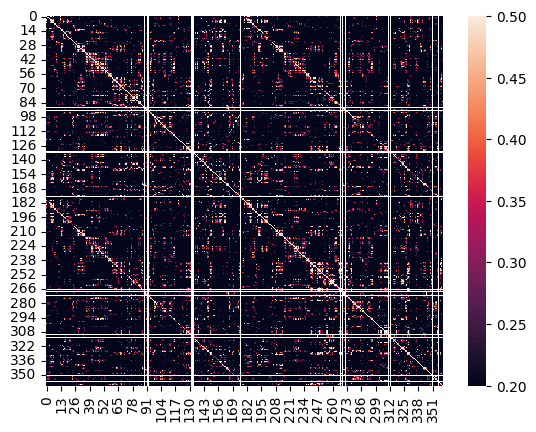

In [72]:
# plot correlations 
sns.heatmap(correlations, vmin=0.2, vmax=0.5);


In [73]:
# plot seed to glasser correlations 
seed2glasser

array([-0.22026314, -0.0630227 , -0.01739505, -0.11088478, -0.06969592,
       -0.07424747, -0.13299707,  0.04232328, -0.01014143,  0.14728162,
        0.19610935, -0.01527994, -0.03631769, -0.01781941,  0.05834214,
       -0.03698931,  0.06495818, -0.0909858 , -0.01653968, -0.13802637,
       -0.06719885,  0.02127471, -0.02366255,  0.14541374,  0.19032441,
        0.00095733,  0.09077995,  0.25938587, -0.11902909, -0.08681969,
       -0.08804796, -0.00160101, -0.13634352, -0.18358265, -0.14989829,
        0.14271736,  0.10480511,  0.21204697, -0.02181659,  0.10349195,
        0.13401575,  0.17757899,  0.18595035,  0.29799052,  0.13505146,
        0.11525764,  0.0421151 ,  0.05508581,  0.07411574,  0.00505892,
        0.19617465,  0.11402506, -0.02960326,  0.15599533,  0.14346251,
        0.24365044,  0.08230954,  0.13859318,  0.09461196,  0.08523073,
       -0.0915336 , -0.03466218, -0.05520541, -0.10383261, -0.12032397,
        0.00401192,  0.04326158, -0.14787575, -0.13691379,  0.09

In [51]:
seed2seed

(360,)

In [54]:
lh_parc, rh_parc = load_parcellation()

FileNotFoundError: /Users/laurituominen/anaconda3/lib/python3.10/site-packages/brainspace/datasets/parcellations/glasser_400_conte69.csv not found.